In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=2)  # Make sure everything is readable.
sns.set_style("whitegrid")

In [54]:
# import data
mle_lm_path  = 'csv/run_best_mle_TB-tag-eval_lm_score.csv'
mle_rlm_path = 'csv/run_best_mle_TB-tag-eval_rlm_score.csv'

seqgan_mix_beta0_mti0_lm_path  = 'csv/run_seqgan_mix_beta0_mti0_TB-tag-eval_lm_score.csv'
seqgan_mix_beta0_mti0_rlm_path = 'csv/run_seqgan_mix_beta0_mti0_TB-tag-eval_rlm_score.csv'

seqgan_lm_beta0_mti0_lm_path  = 'csv/run_seqgan_lm_beta0_mti0_TB-tag-eval_lm_score.csv'
seqgan_lm_beta0_mti0_rlm_path = 'csv/run_seqgan_lm_beta0_mti0_TB-tag-eval_rlm_score.csv'

seqgan_mix_beta0_mti1_lm_path  = 'csv/run_seqgan_mix_beta0_mti1_TB-tag-eval_lm_score.csv'
seqgan_mix_beta0_mti1_rlm_path = 'csv/run_seqgan_mix_beta0_mti1_TB-tag-eval_rlm_score.csv'

stepgan_lm_beta0_mti1_lm_path  = 'csv/run_stepgan_lm_beta0_mti1_TB-tag-eval_lm_score.csv'
stepgan_lm_beta0_mti1_rlm_path = 'csv/run_stepgan_lm_beta0_mti1_TB-tag-eval_rlm_score.csv'



In [56]:
mle_lm = pd.read_csv(mle_lm_path).drop_duplicates('Step')
mle_rlm = pd.read_csv(mle_rlm_path).drop_duplicates('Step')

seqgan_mix_beta0_mti0_lm  = pd.read_csv(seqgan_mix_beta0_mti0_lm_path).drop_duplicates('Step')
seqgan_mix_beta0_mti0_rlm = pd.read_csv(seqgan_mix_beta0_mti0_rlm_path).drop_duplicates('Step')

seqgan_lm_beta0_mti0_lm  = pd.read_csv(seqgan_lm_beta0_mti0_lm_path).drop_duplicates('Step')
seqgan_lm_beta0_mti0_rlm = pd.read_csv(seqgan_lm_beta0_mti0_rlm_path).drop_duplicates('Step')

seqgan_mix_beta0_mti1_lm  = pd.read_csv(seqgan_mix_beta0_mti1_lm_path).drop_duplicates('Step')
seqgan_mix_beta0_mti1_rlm = pd.read_csv(seqgan_mix_beta0_mti1_rlm_path).drop_duplicates('Step')

stepgan_lm_beta0_mti1_lm  = pd.read_csv(stepgan_lm_beta0_mti1_lm_path).drop_duplicates('Step')
stepgan_lm_beta0_mti1_rlm = pd.read_csv(stepgan_lm_beta0_mti1_rlm_path).drop_duplicates('Step')


In [57]:
# mle_lm = mle_lm[mle_lm.Step.map(lambda x : x in temperatures)]
# mle_rlm = mle_rlm[mle_rlm.Step.map(lambda x : x in temperatures)]

# seqgan_mix_beta0_mti1_lm = seqgan_mix_beta0_mti1_lm[seqgan_mix_beta0_mti1_lm.Step.map(lambda x : x in temperatures)]
# seqgan_mix_beta0_mti1_rlm = seqgan_mix_beta0_mti1_rlm[seqgan_mix_beta0_mti1_rlm.Step.map(lambda x : x in temperatures)]

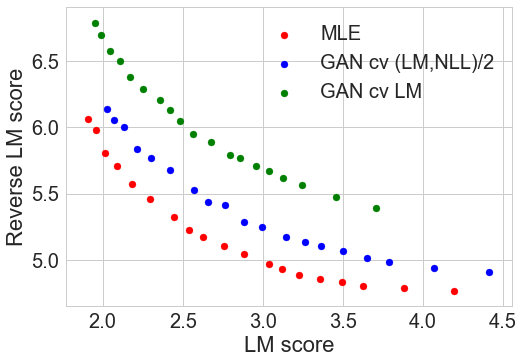

In [58]:
plt.scatter(mle_lm.Value, \
            mle_rlm.Value, \
            c='r',
            label='MLE')

plt.scatter(seqgan_mix_beta0_mti0_lm.Value, \
            seqgan_mix_beta0_mti0_rlm.Value, \
            c='b',
            label='GAN cv (LM,NLL)/2')

plt.scatter(seqgan_lm_beta0_mti0_lm.Value, \
            seqgan_lm_beta0_mti0_rlm.Value, \
            c='g',
            label='GAN cv LM')

#plt.colorbar(sc)
plt.xlabel('LM score')
plt.ylabel('Reverse LM score')
# plt.axis([0, 0.6, 0, 1.1])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend()
plt.savefig('figs/lm_rlm_temperature_mti0.png')
plt.show()


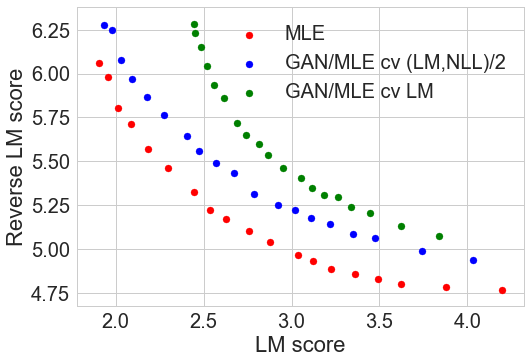

In [59]:
plt.scatter(mle_lm.Value, \
            mle_rlm.Value, \
            c='r',
            label='MLE')

plt.scatter(seqgan_mix_beta0_mti1_lm.Value, \
            seqgan_mix_beta0_mti1_rlm.Value, \
            c='b',
            label='GAN/MLE cv (LM,NLL)/2')

plt.scatter(stepgan_lm_beta0_mti1_lm.Value, \
            stepgan_lm_beta0_mti1_rlm.Value, \
            c='g',
            label='GAN/MLE cv LM')

#plt.colorbar(sc)
plt.xlabel('LM score')
plt.ylabel('Reverse LM score')
# plt.axis([0, 0.6, 0, 1.1])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend()
plt.savefig('figs/lm_rlm_temperature_mti1.png')
plt.show()

## previous entropy_plot

In [2]:
data = pd.read_csv('results_entropy_alpha_HBLEU1.csv')
# data

In [3]:
temperature = data[data.model.map(lambda x: 'alphat' in x)]



In [4]:
temperature.color = -temperature.model.map(lambda x: float(x.split('alphat')[1].split('_')[0]))

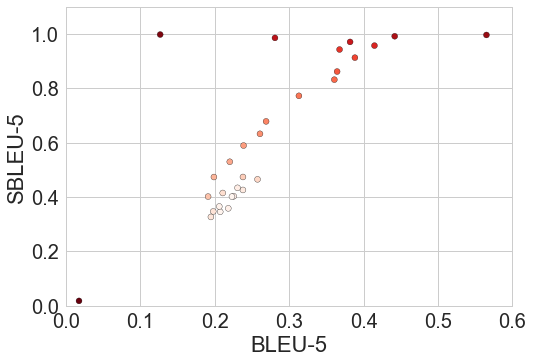

In [8]:
cm = plt.cm.get_cmap('Reds')

sc = plt.scatter(temperature.BLEU.values, \
                 temperature.SBLEU.values, \
                 c=temperature.color.values, vmin=-1, vmax=0, s=35, cmap=cm, edgecolors='k')
#plt.colorbar(sc)
plt.xlabel('BLEU-5')
plt.ylabel('SBLEU-5')
plt.axis([0, 0.6, 0, 1.1])
plt.savefig('alpha_temperature_reg.png')
plt.show()


In [6]:
entropy = data[data.model.map(lambda x: 'mew' in x)]
entropy.color_temp = entropy.model.map(lambda x: x.split('mew')[1].split('_')[0])
entropy.color = entropy.color_temp.rank().values


In [7]:
cm = plt.cm.get_cmap('Reds')
z = xy
sc = plt.scatter(entropy.BLEU.values, entropy.SBLEU.values, c=entropy.color, vmin=0, vmax=30, s=35, cmap=cm, edgecolors='k')
#plt.colorbar(sc)
plt.xlabel('BLEU-5')
plt.ylabel('SBLEU-5')
plt.axis([0, 0.6, 0, 1.1])
plt.savefig('alpha_entropy_reg.png')
plt.show()


NameError: name 'xy' is not defined